In [1]:
import pandas as pd 

df = pd.read_csv("heart.csv")
print (df.head(5))
print (df.info())

    0  1  2    3    4  5  6    7  8    9  10  11  12 13
0  70  1  4  130  322  0  2  109  0  2.4   2   3   3  b
1  67  0  3  115  564  0  2  160  0  1.6   2   0   7  a
2  57  1  2  124  261  0  0  141  0  0.3   1   0   7  b
3  64  1  4  128  263  0  0  105  1  0.2   2   1   7  a
4  74  0  2  120  269  0  2  121  1  0.2   1   1   3  a
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       270 non-null    int64  
 1   1       270 non-null    int64  
 2   2       270 non-null    int64  
 3   3       270 non-null    int64  
 4   4       270 non-null    int64  
 5   5       270 non-null    int64  
 6   6       270 non-null    int64  
 7   7       270 non-null    int64  
 8   8       270 non-null    int64  
 9   9       270 non-null    float64
 10  10      270 non-null    int64  
 11  11      270 non-null    int64  
 12  12      270 non-null    int64  
 13 

13
a    150
b    120
Name: count, dtype: int64


<Axes: xlabel='13', ylabel='count'>

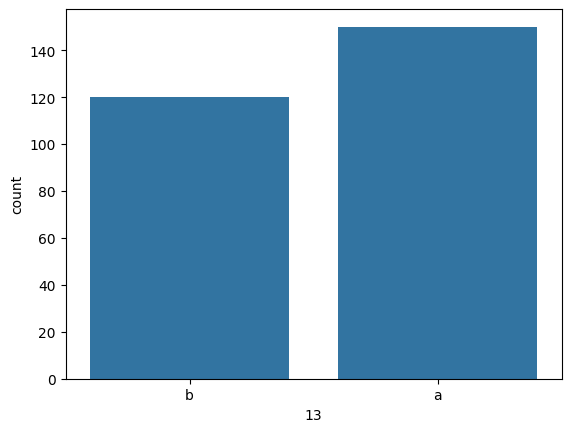

In [2]:
# kiểm tra tính cân bằng của dữ liệu
import seaborn as sns
print (df["13"].value_counts())
sns.countplot(data = df, x = "13")

In [3]:
# tiền xử lý dữ liệu, chuyển đổi dữ liệu phi số
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["13"] = le.fit_transform(df["13"])
df.head(5)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# tạo dữ liệu đầu vào và nhãn đầu ra tương ứng
df_X = df.iloc[:, : -1]
df_y = df.iloc[:, -1]

# chia bộ dữ liệu thành 2 phần train và test
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)

(202, 13)
(202,)


In [5]:
# khởi tạo mô hình SVM
svc = SVC()
# huấn luyện mô hình với dữ liệu đầu vào là tập X_train, y_train
svc.fit(X_train, y_train)

SVC()

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        40
           1       0.69      0.39      0.50        28

    accuracy                           0.68        68
   macro avg       0.68      0.63      0.63        68
weighted avg       0.68      0.68      0.65        68



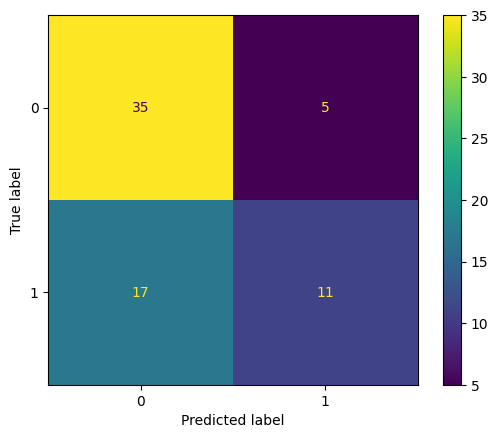

In [6]:
# đánh giá mô hình lần 1
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)

In [7]:
# cải thiện mô hình lần 1
# sử dụng thuật toán GridSearch để tìm kiếm tham số tốt nhất cho mô hình
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

parameters = {
    'clf__kernel': ['linear', 'rbf', 'poly', 'sigmoid'], # các dạng hàm kernel
    'clf__C': [0.05, 1, 100], # trọng số của phạt phân loại sai
    'clf__coef0': [2, 3, 4], # tương ứng với tham số gamma của đa thức
    'clf__degree': [1, 2, 3] # bậc d của đa thức
}
pipeline = Pipeline([('clf', SVC())])
cv = GridSearchCV(pipeline, parameters, cv=5, n_jobs=12, scoring='accuracy', verbose=2, refit=True)
cv.fit(X_train, y_train)

# đưa ra tham số của mô hình
cv.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'clf__C': 100, 'clf__coef0': 4, 'clf__degree': 3, 'clf__kernel': 'poly'}

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        40
           1       0.88      0.75      0.81        28

    accuracy                           0.85        68
   macro avg       0.86      0.84      0.84        68
weighted avg       0.85      0.85      0.85        68



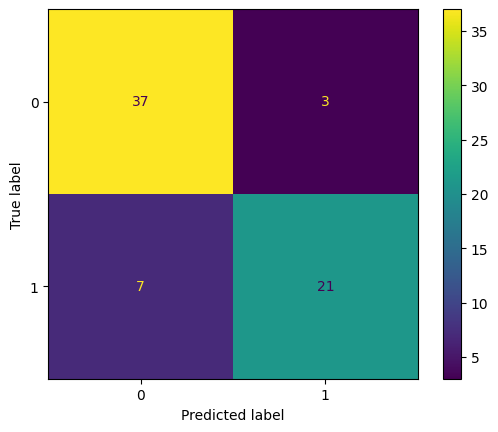

In [8]:
# đánh giá mô hình lần 2
y_pred_2 = cv.predict(X_test)
print(classification_report(y_test, y_pred_2))
ConfusionMatrixDisplay.from_estimator(cv, X_test, y_test)

# nhận thấy mô hình đã cải thiện accuracy từ 0.68 lên 0.85

In [9]:
# cải thiện mô hình lần 2, nhưng lần này sẽ chuẩn hóa trước khi fit()
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pipeline = Pipeline([
    ('scaler', MinMaxScaler()), # chuẩn hóa min-max
    ('clf', SVC()),
])
cv = GridSearchCV(pipeline, parameters, cv=5, n_jobs=12, scoring='accuracy', verbose=2, refit=True)
cv.fit(X_train, y_train)

cv.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'clf__C': 1, 'clf__coef0': 2, 'clf__degree': 1, 'clf__kernel': 'rbf'}

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        40
           1       0.76      0.79      0.77        28

    accuracy                           0.81        68
   macro avg       0.80      0.81      0.80        68
weighted avg       0.81      0.81      0.81        68



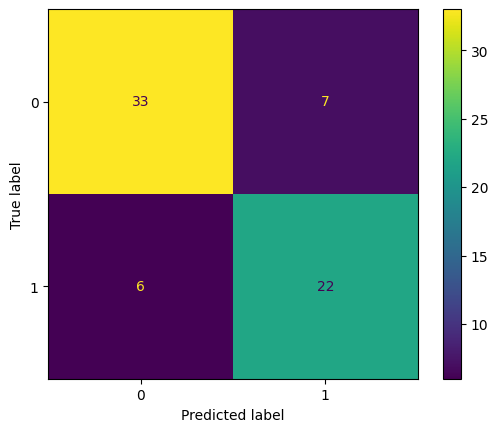

In [10]:
# đánh giá mô hình lẩn 3
y_pred_3 = cv.predict(X_test)
print(classification_report(y_test, y_pred_3))
ConfusionMatrixDisplay.from_estimator(cv, X_test, y_test)

In [11]:
# cải thiện mô hình lần 3, sử dụng kỹ thuật trích chọn thuộc tính
df.corr()['13'].sort_values(ascending=False)

13    1.000000
12    0.525020
11    0.455336
8     0.419303
9     0.417967
2     0.417436
10    0.337616
1     0.297721
0     0.212322
6     0.182091
3     0.155383
4     0.118021
5    -0.016319
7    -0.418514
Name: 13, dtype: float64

In [12]:
# loại bỏ đi 3 thuộc tính dư thừa
df_X = df.drop(columns=['6', '3', '4'], axis=1)
df_y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)

(202, 11)
(202,)


In [13]:
# đánh giá mô hình lần 4
y_pred_4 = cv.predict(X_test)
print(classification_report(y_test, y_pred_4))
ConfusionMatrixDisplay.from_estimator(cv, X_test, y_test)

# kết quả thu về là accuracy là 100%

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 13
Feature names seen at fit time, yet now missing:
- 3
- 4
- 6
